# Data Exploration

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
def timekey_to_quarter(tk):
    year = 1980 + tk // 4
    quarter = (tk % 4) + 1
    return f"{year}Q{quarter}"

## Trend of Deposits

In [22]:
df = pd.read_csv('data/full_modeling.csv')
df['Quarter_Label'] = df['timekey'].apply(timekey_to_quarter)

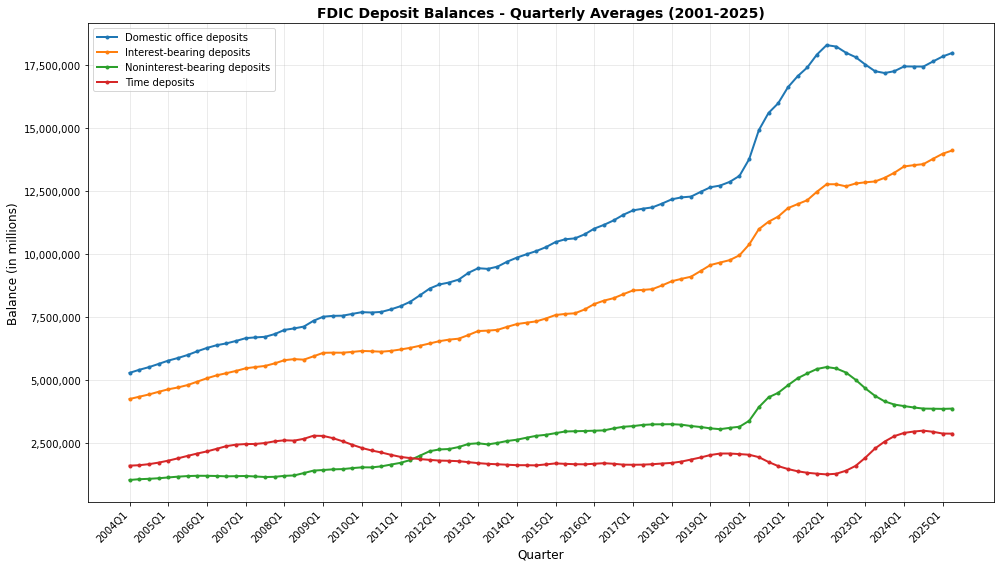

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))
col_deposits = ['Domestic office deposits', 
                'Interest-bearing deposits', 
                'Noninterest-bearing deposits', 
                'Time deposits']
for col in col_deposits:
    avg_col = f'{col}_Avg'
    ax.plot(df['timekey'], df[avg_col], 
            marker='o', markersize=3, label=col, linewidth=2)

tick_positions = df['timekey'][::4]  # Every 4th quarter
tick_labels = df['Quarter_Label'][::4]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Balance (in millions)', fontsize=12)
ax.set_title('FDIC Deposit Balances - Quarterly Averages (2001-2025)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.tight_layout()
plt.savefig('./figures/trend_deposit_balances_trend.png', dpi=300, bbox_inches='tight')
plt.show()

- Domestic office deposits
    - The deposits has been generally growing in the past years.
    - Except for 2022-2023, some deposits left banks because of high interest rates.
    - Domestic deposit resumes increasing after 2023, because of interest-bearing deposits.
- Interest bearing deposits
    - Long-term growth from 2001 to 2025, except for a slight decrease in 2022-2023.  Depositer left bank for higher return.
    - Increase after 2023 because of increase in time deposits.
- Noninterest-bearing deposits
    - Long-term growth and rocket during Covid because of reduced spending.
    - Decrease since 2022 because money is moved to interest bearing accounts.
- Time deposit 
    - Increases after 2022 because of high yields.

## Trend of Deposits vs Macroeconomic variables

In [24]:
df = pd.read_csv('data/full_modeling.csv')
df['Quarter_Label'] = df['timekey'].apply(timekey_to_quarter)

- Domestic office deposits vs M2

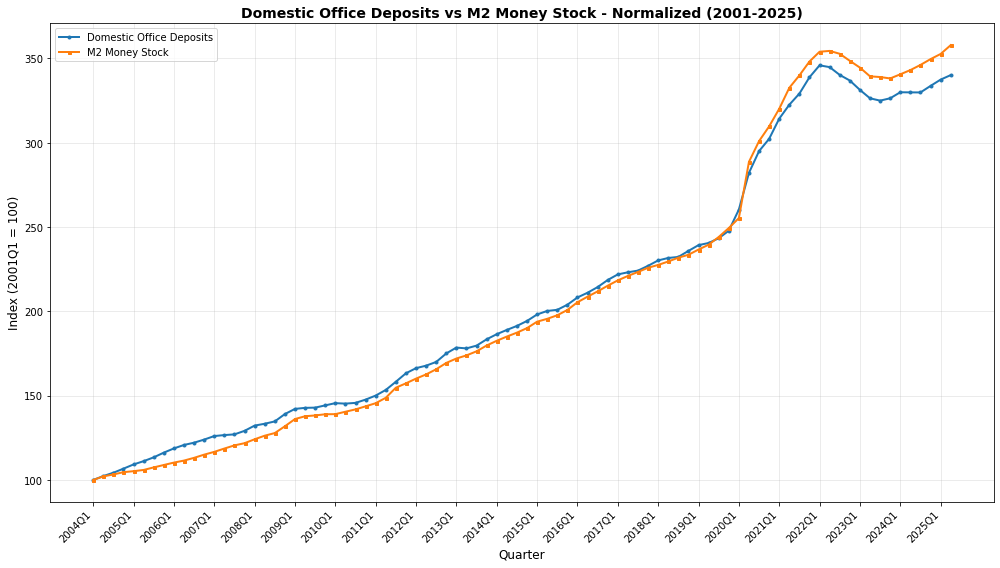

In [25]:
# Normalize to 100
df['Deposits_Normalized'] = (df['Domestic office deposits_Avg'] / 
                                   df['Domestic office deposits_Avg'].iloc[0]) * 100
df['M2_Normalized'] = (df['M2_AVG'] / df['M2_AVG'].iloc[0]) * 100

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['timekey'], df['Deposits_Normalized'], 
        linewidth=2, label='Domestic Office Deposits', marker='o', markersize=3)
ax.plot(df['timekey'], df['M2_Normalized'], 
        linewidth=2, label='M2 Money Stock', marker='s', markersize=3)

ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Index (2001Q1 = 100)', fontsize=12)
ax.set_title('Domestic Office Deposits vs M2 Money Stock - Normalized (2001-2025)', 
             fontsize=14, fontweight='bold')

tick_positions = df['timekey'][::4]
tick_labels = df['Quarter_Label'][::4]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/trend_deposits_vs_m2_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

- Time Deposits vs FED_FUNDS

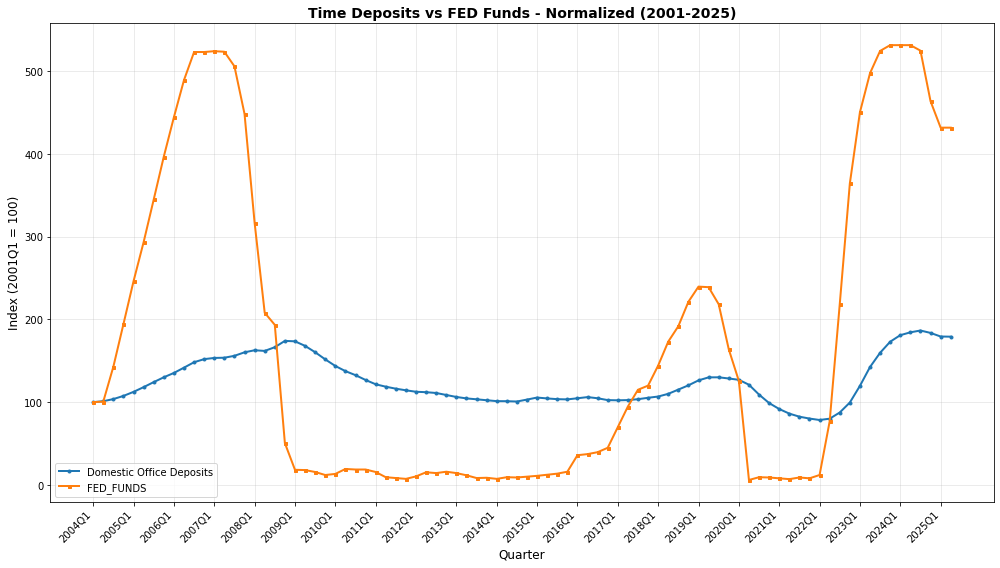

In [26]:
# Normalize both to 100
df['Time deposits_Normalized'] = (df['Time deposits_Avg'] / 
                                   df['Time deposits_Avg'].iloc[0]) * 100
df['FED_FUNDS_Normalized'] = (df['FED_FUNDS_AVG'] / df['FED_FUNDS_AVG'].iloc[0]) * 100
df['TREASURY_3M_CHG_Normalized'] = (df['TREASURY_3M_CHG'] / df['TREASURY_3M_CHG'].iloc[0]) * 100

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['timekey'], df['Time deposits_Normalized'], 
        linewidth=2, label='Domestic Office Deposits', marker='o', markersize=3)
ax.plot(df['timekey'], df['FED_FUNDS_Normalized'], 
        linewidth=2, label='FED_FUNDS', marker='s', markersize=3)

ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Index (2001Q1 = 100)', fontsize=12)
ax.set_title('Time Deposits vs FED Funds - Normalized (2001-2025)', 
             fontsize=14, fontweight='bold')

tick_positions = df['timekey'][::4]
tick_labels = df['Quarter_Label'][::4]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/trend_time_deposits_vs_fed_funds.png', dpi=300, bbox_inches='tight')
plt.show()

- Interest-bearing deposits vs M2

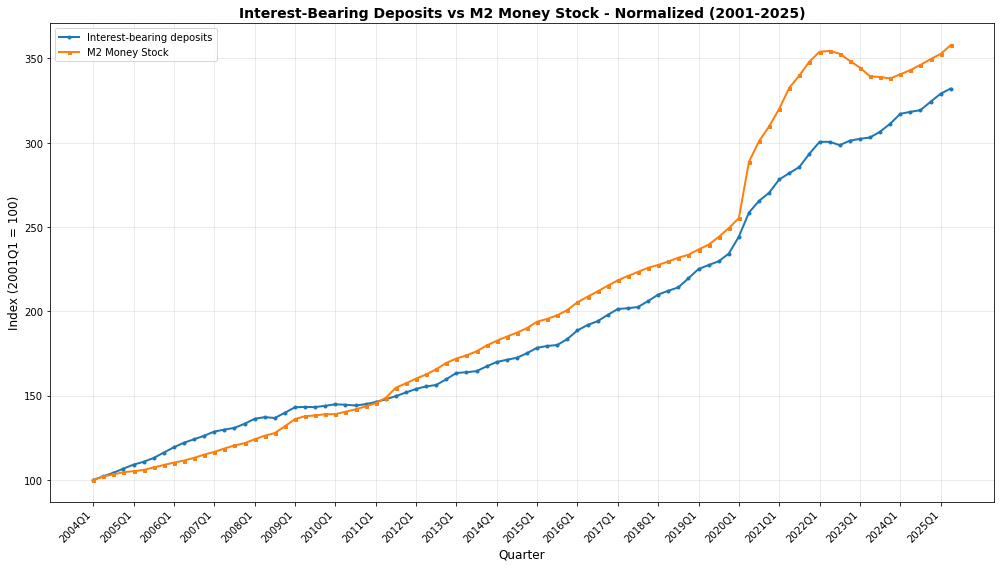

In [27]:
# Normalize to 100
df['Deposits_Normalized'] = (df['Interest-bearing deposits_Avg'] / 
                                   df['Interest-bearing deposits_Avg'].iloc[0]) * 100
df['M2_Normalized'] = (df['M2_AVG'] / df['M2_AVG'].iloc[0]) * 100

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['timekey'], df['Deposits_Normalized'], 
        linewidth=2, label='Interest-bearing deposits', marker='o', markersize=3)
ax.plot(df['timekey'], df['M2_Normalized'], 
        linewidth=2, label='M2 Money Stock', marker='s', markersize=3)

ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Index (2001Q1 = 100)', fontsize=12)
ax.set_title('Interest-Bearing Deposits vs M2 Money Stock - Normalized (2001-2025)', 
             fontsize=14, fontweight='bold')

tick_positions = df['timekey'][::4]
tick_labels = df['Quarter_Label'][::4]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/trend_IB_deposits_vs_m2_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

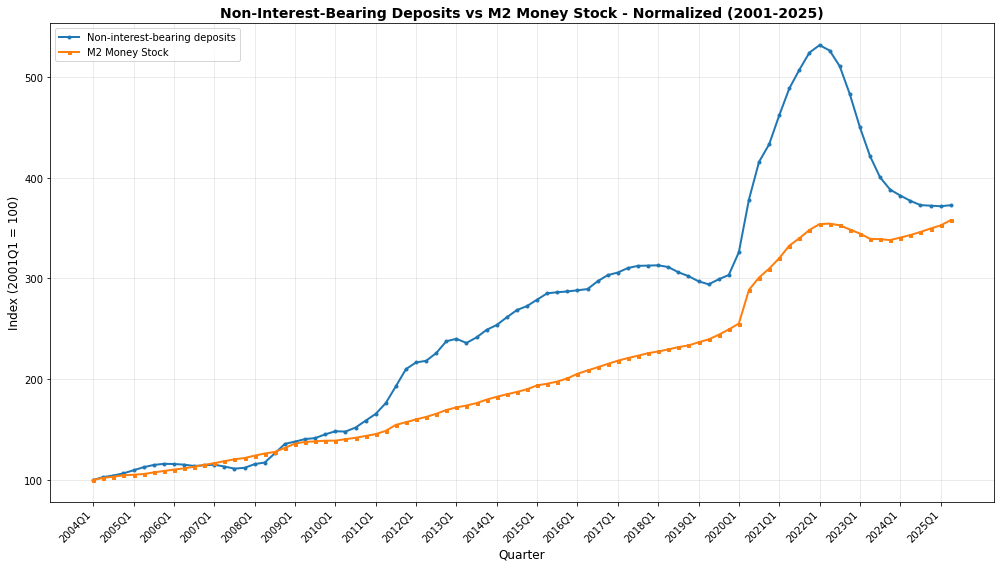

In [28]:
# Normalize to 100
df['Deposits_Normalized'] = (df['Noninterest-bearing deposits_Avg'] / 
                                   df['Noninterest-bearing deposits_Avg'].iloc[0]) * 100
df['LABOR_FORCE_YOY_Normalized'] = (df['LABOR_FORCE_YOY'] / df['LABOR_FORCE_YOY'].iloc[0]) * 100
df['M2_Normalized'] = (df['M2_AVG'] / df['M2_AVG'].iloc[0]) * 100

#df['FED_FUNDS_ROC4_Normalized'] = (df['FED_FUNDS_ROC4'] / df['FED_FUNDS_ROC4'].iloc[0]) * 100


fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['timekey'], df['Deposits_Normalized'], 
        linewidth=2, label='Non-interest-bearing deposits', marker='o', markersize=3)
ax.plot(df['timekey'], df['M2_Normalized'], 
        linewidth=2, label='M2 Money Stock', marker='s', markersize=3)


ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Index (2001Q1 = 100)', fontsize=12)
ax.set_title('Non-Interest-Bearing Deposits vs M2 Money Stock - Normalized (2001-2025)', 
             fontsize=14, fontweight='bold')

tick_positions = df['timekey'][::4]
tick_labels = df['Quarter_Label'][::4]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/trend_NIB_deposits_vs_m2_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

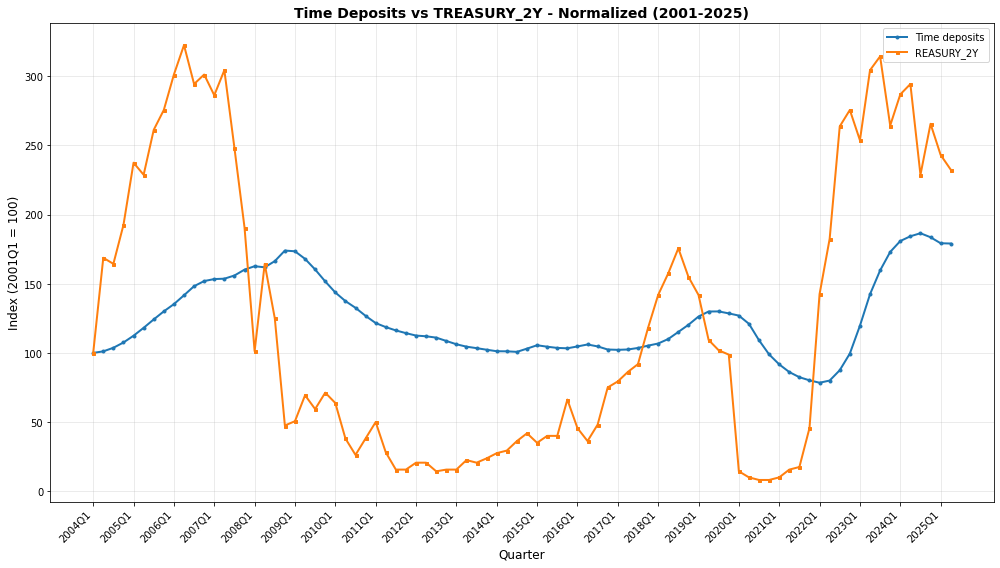

In [38]:
# Normalize to 100
df['Deposits_Normalized'] = (df['Time deposits_Avg'] / 
                                   df['Time deposits_Avg'].iloc[0]) * 100
df['TREASURY_2Y_Normalized'] = (df['TREASURY_2Y'] / df['TREASURY_2Y'].iloc[0]) * 100
df['CPI_Normalized'] = (df['CPI'] / df['CPI'].iloc[0]) * 100
df['M2_Normalized'] = (df['M2_AVG'] / df['M2_AVG'].iloc[0]) * 100

#df['FED_FUNDS_ROC4_Normalized'] = (df['FED_FUNDS_ROC4'] / df['FED_FUNDS_ROC4'].iloc[0]) * 100


fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['timekey'], df['Deposits_Normalized'], 
        linewidth=2, label='Time deposits', marker='o', markersize=3)
ax.plot(df['timekey'], df['TREASURY_2Y_Normalized'], 
        linewidth=2, label='REASURY_2Y', marker='s', markersize=3)
#ax.plot(df['timekey'], df['M2_Normalized'], 
#        linewidth=2, label='M2 Money Stock', marker='s', markersize=3)


ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Index (2001Q1 = 100)', fontsize=12)
ax.set_title('Time Deposits vs TREASURY_2Y - Normalized (2001-2025)', 
             fontsize=14, fontweight='bold')

tick_positions = df['timekey'][::4]
tick_labels = df['Quarter_Label'][::4]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/trend_time_deposits_vs_TREASURY_2Y_normalized.png', dpi=300, bbox_inches='tight')
plt.show()